In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from calculation import score, matrix, predictors

In [3]:
size = 1000
x0 = np.random.randn(size)
x1 = np.random.lognormal(2,2,size)
x2 = x1*x0# + np.random.lognormal(size = size)
x3 = x1 + x0# + np.random.lognormal(size = size)
c0 = np.random.randint(0,9, size = size)
c1 = np.random.randint(0,9, size = size)
c2 = c1.copy()
c2[:size//2] = np.random.choice(c2[:size//2], size = len(c2[:size//2]),)

In [4]:
data = pd.DataFrame({
    "x0":x0,
    "x1":x1,
    "x2":x2,
    "x3":x3,
    "c0":c0.astype(str),
    "c1":c1.astype(str),
    "c2":c2.astype(str),
})

In [5]:
results  = matrix(data, conditional = "x1", catch_errors = False)
mx = results.pivot(index = "x", columns = "y", values = "ppscore")

<AxesSubplot:xlabel='y', ylabel='x'>

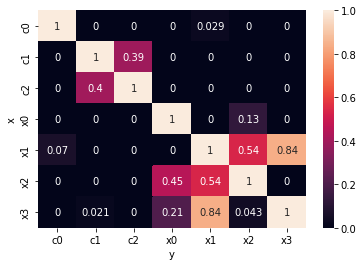

In [6]:
sns.heatmap(mx,annot = True)

# Conditional Dependence

In [32]:
n = 10_000
x0 = np.random.uniform(-5,5,n)
x1 = np.random.uniform(-5,5,n)
y = np.zeros(n)
y = np.where(np.isclose(x0, x1, atol=5e-1, equal_nan=False), 1, y)
y = np.where(np.isclose(x0, -x1, atol=5e-1, equal_nan=False), 1, y)


In [34]:
cond_data = pd.DataFrame({
    "x0":x0.flatten(),
    "x1":x1.flatten(),
    "y":y.flatten(),
})

<AxesSubplot:xlabel='x0', ylabel='x1'>

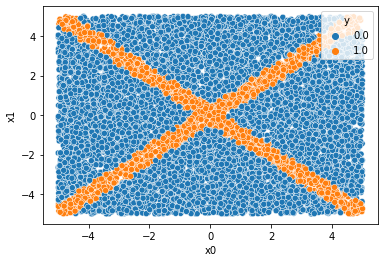

In [36]:
# x0 and x1 are only associated through y
# x0 and x1 association is bimodal, such that a simple regressor would not identify
sns.scatterplot(data = cond_data, x = "x0",y = "x1", hue = "y")

<AxesSubplot:xlabel='x0', ylabel='Density'>

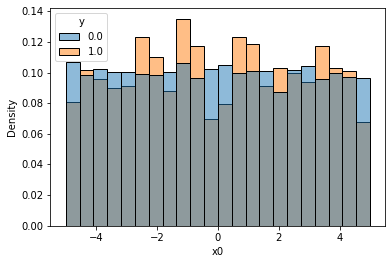

In [37]:
sns.histplot(data = cond_data, x="x0", hue = "y", stat = 'density', common_norm = False)

In [42]:
cond_results  = matrix(cond_data, conditional = "y", catch_errors = False, n_bins = 30, average = "weighted")
results  = matrix(cond_data, conditional = None, catch_errors = False)

mx = results.pivot(index = "x", columns = "y", values = "ppscore")
mx_cond = cond_results.pivot(index = "x", columns = "y", values = "ppscore")

/home/jovyan/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/jovyan/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/jovyan/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/jovyan/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

Text(0.5, 1.0, 'unconditional dependence')

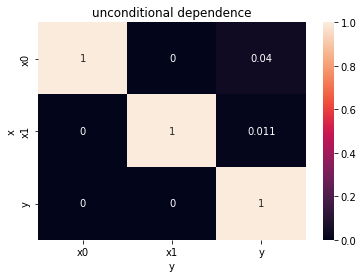

In [43]:
ax = sns.heatmap(mx,annot = True)
ax.set_title("unconditional dependence")

Text(0.5, 1.0, 'conditional dependence')

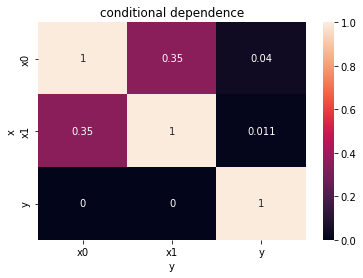

In [44]:
ax = sns.heatmap(mx_cond,annot = True)
ax.set_title("conditional dependence")